In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import json
import numpy as np
import scipy as sp
import scipy.stats as st
import scipy.integrate as integrate
from sklearn import linear_model

import tikzplotlib

sns.set_style("whitegrid")
# sns.set_palette("colorblind")
palette = sns.color_palette()
figsize = (20,10)
legend_fontsize = 20


# Bias-variance-noise decomposition

In [46]:
## Оверфиттинг
## Исходная функция
orig = lambda x : np.sin(2*x)

## X-координаты точек данных
xd = np.array([-3, -2, -1, -0.5, 0, 0.5, 1, 1.5, 2.5, 3, 4]) / 2
num_points = len(xd)

## Данные
data = orig(xd) + np.random.normal(0, .25, num_points)

## Для рисования
xs = np.arange(xd[0]-1.5, xd[-1]+1.5, 0.05)

## Для тестового множества
xd_large = np.arange(-1.5, 2, 0.05)
num_points_l = len(xd_large)
data_large = orig(xd_large) + np.random.normal(0, .25, num_points_l)


[0.16027515]
[ 0.32870263 -0.31909236]
[ 1.42362953  0.0639621  -0.54002313]
[ 1.87815582 -0.65180989 -0.83123099  0.2727348 ]
[ 2.29124464 -0.03055413 -1.52023641 -0.00967375  0.21611905]
[ 2.29842688 -0.04398172 -1.53596478  0.00553223  0.22188692 -0.00413335]
[ 2.33409239  0.31072432 -1.79881618 -0.49210573  0.52988807  0.15091083
 -0.08731798]
[ 1.71184148  0.04461514  1.81224721 -1.17826057 -3.57906147  1.64372746
  1.08127308 -0.50493256]
[ 1.84498378 -0.84755445  1.0067774   2.689789   -3.52386893 -2.44331738
  2.18153692  0.62471286 -0.43435593]
[  2.51099622   2.69076115 -10.40319831 -13.17208451  41.30861535
   5.14769596 -44.362563    10.37114997  12.37184001  -4.57520294]


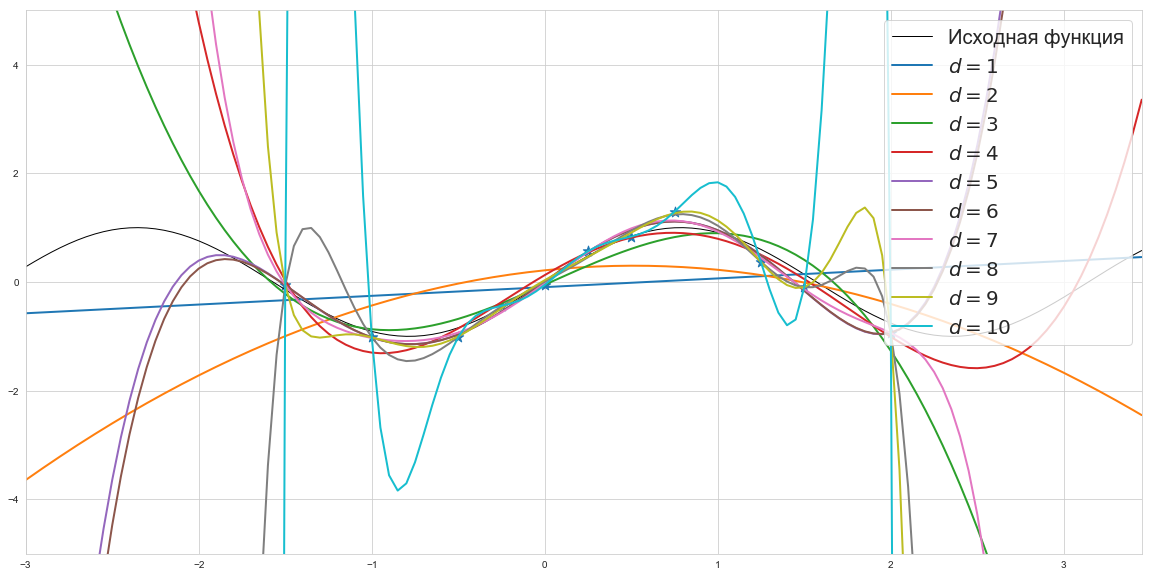

In [47]:
## Выделение полиномиальных признаков
xs_d = np.vstack([xs ** i for i in range(1, num_points+1)]).transpose()
xd_d = np.vstack([xd ** i for i in range(1, num_points+1)]).transpose()
xd_large_d = np.vstack([xd_large ** i for i in range(1, num_points+1)]).transpose()

fig = plt.figure(figsize=figsize)
ax = fig.add_subplot(111)
ax.set_xlim((xs[0], xs[-1]))
ax.set_ylim((-5, 5))
ax.scatter(xd, data, marker='*', s=120)
ax.plot(xs, orig(xs), linewidth=1, label="Исходная функция", color="black")

set_of_powers = np.arange(1, 11)
# [ 3, 5, 10 ]
test_errors = { }

for d in set_of_powers:
    cur_model = linear_model.LinearRegression(fit_intercept=True).fit( xd_d[:, :d], data )
    cur_pred = cur_model.predict(xd_large_d[:, :d])
    test_errors[d] = np.mean((cur_pred - data_large)**2)
    print(cur_model.coef_)
    ax.plot(xs, cur_model.predict( xs_d[:, :d] ), linewidth=2, label="$d=%d$" % d)

ax.legend(loc="upper right", fontsize=legend_fontsize)

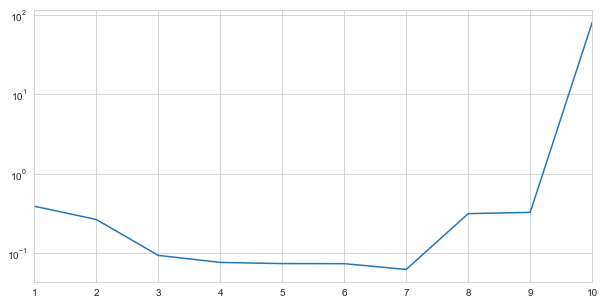

In [48]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
plt.yscale('log')
ax.set_xlim(set_of_powers[0], set_of_powers[-1])
# ax.set_ylim((-5, 5))
# ax.plot()
ax.plot(set_of_powers, [test_errors[k] for k in set_of_powers], )

[-0.05805826 -1.01730112 -1.01159216 -0.43867975 -0.05393047  0.56707835
  0.8355554   1.29308673  0.35994389 -0.09383657 -0.93899536]
[-0.05805826 -1.01730112 -1.01159216 -0.43867975 -0.05393047  0.56707835
  0.8355554   0.          0.35994389 -0.09383657 -0.93899536]
[-0.09086369]


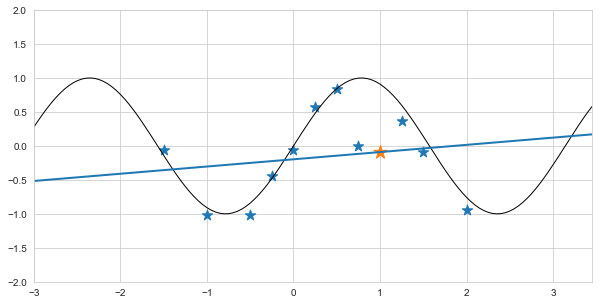

In [52]:
d = 1
x_pred = 1

new_data = np.copy(data)
new_data[7] = 0
cur_model = linear_model.LinearRegression(fit_intercept=True).fit( xd_d[:, :d], new_data )

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
ax.set_xlim((xs[0], xs[-1]))
ax.set_ylim((-2, 2))
ax.scatter(xd, new_data, marker='*', s=120)
ax.plot(xs, orig(xs), linewidth=1, label="Исходная функция", color="black")
ax.plot(xs, cur_model.predict( xs_d[:, :d] ), linewidth=2, label="$d=%d$" % d)
y_pred = cur_model.predict(np.array([x_pred]).reshape(1,-1))
ax.scatter(x_pred, y_pred, marker='*', s=200)


print(data)
print(new_data)
print(y_pred)

[-0.21213606075156183, -0.20000882417104487, -0.18788158759052803, -0.17575435101001116, -0.16362711442949418, -0.15149987784897734, -0.13937264126846044, -0.12724540468794351, -0.11511816810742667, -0.10299093152690973, -0.09086369494639288, -0.078736458365876, -0.06660922178535907, -0.05448198520484214, -0.04235474862432527, -0.030227512043808386, -0.018100275463291488, -0.005973038882774562, 0.006154197697742336, 0.01828143427825918]


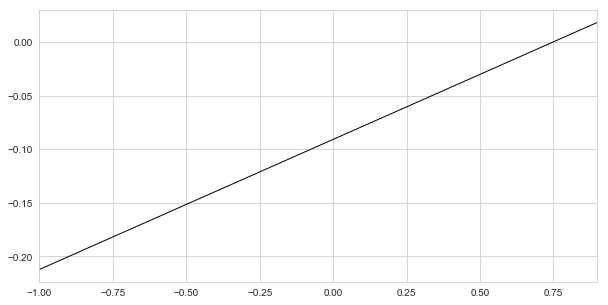

In [57]:
def get_one_prediction(x_pred, cur_y, d=1, data_ind=7, data=data):
    new_data = np.copy(data)
    new_data[data_ind] = cur_y
    cur_model = linear_model.LinearRegression(fit_intercept=True).fit( xd_d[:, :d], new_data )
    return cur_model.predict(np.array([x_pred]).reshape(1,-1))[0]

x_pred = 1
ys = np.arange(-1, 1, 0.1)
one_pred = [ get_one_prediction(x_pred, y) for y in ys ]
print(one_pred)

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
ax.set_xlim((ys[0], ys[-1]))
# ax.set_ylim((-2, 2))
# ax.scatter(xd, new_data, marker='*', s=120)
ax.plot(ys, one_pred, linewidth=1, label="Предсказание в точке %.2f" % x_pred, color="black")
# ax.plot(xs, cur_model.predict( xs_d[:, :d] ), linewidth=2, label="$d=%d$" % d)
# y_pred = cur_model.predict(np.array([x_pred]).reshape(1,-1))
# ax.scatter(x_pred, y_pred, marker='*', s=200)


## Добавим ещё данных

In [ ]:
## Исходная функция
orig = lambda x : np.sin(2*x)

## X-координаты точек данных
xd_large = np.arange(-1.5, 2, 0.05)
num_points_l = len(xd_large)

## Данные
data_large = orig(xd_large) + np.random.normal(0, .25, num_points_l)

## Для 
# xs = np.arange(xd_large[0]-.5, xd_large[-1]+.5, 0.01)

## Выделение полиномиальных признаков
xs_d = np.vstack([xs ** i for i in range(1, num_points+1)]).transpose()
xd_d_large = np.vstack([xd_large ** i for i in range(1, num_points+1)]).transpose()

fig = plt.figure(figsize=figsize)
ax = fig.add_subplot(111)
ax.set_xlim((xs[0], xs[-1]))
ax.set_ylim((-5, 5))
ax.scatter(xd_large, data_large, marker='*', s=120)
ax.plot(xs, orig(xs), linewidth=2, label="Исходная функция", color="black")

set_of_powers = [ 1, 3, 10 ]

for d in set_of_powers:
    cur_model = linear_model.LinearRegression(fit_intercept=True).fit( xd_d_large[:, :d], data_large )
    ax.plot(xs, cur_model.predict( xs_d[:, :d] ), linewidth=2, label="$d=%d$" % d)

ax.legend(loc="upper center", fontsize=legend_fontsize)

plt.show()

## Регуляризация

In [ ]:
fig = plt.figure(figsize=figsize)
ax = fig.add_subplot(111)
ax.set_xlim((xs[0], xs[-1]))
ax.set_ylim((-5, 5))
ax.scatter(xd, data, marker='*', s=120)
ax.plot(xs, orig(xs), linewidth=2, label="Original function", color="black")

m_ridge_0 = linear_model.LinearRegression(fit_intercept=True).fit( xd_d[:, :10], data )
# linear_model.Lasso(alpha=0, fit_intercept=True).fit( xd_d[:, :12], data )
ax.plot(xs, m_ridge_0.predict( xs_d[:, :10] ), linewidth=2, label="$\\alpha=0.0$")
print(m_ridge_0.coef_)

m_ridge_1 = linear_model.Ridge(alpha=0.001, fit_intercept=True).fit( xd_d[:, :10], data )
# ax.plot(xs, m_ridge_1.predict( xs_d[:, :10] ), linewidth=2, label="$\\alpha=0.001$")
print(m_ridge_1.coef_)

m_ridge_2 = linear_model.Ridge(alpha=0.05, fit_intercept=True).fit( xd_d[:, :10], data )
ax.plot(xs, m_ridge_2.predict( xs_d[:, :10] ), linewidth=2, label="$\\alpha=0.5$")
print(m_ridge_2.coef_)

m_ridge_3 = linear_model.Ridge(alpha=1000.0, fit_intercept=True).fit( xd_d[:, :10], data )
ax.plot(xs, m_ridge_3.predict( xs_d[:, :10] ), linewidth=2, label="$\\alpha=1000.0$")
print(m_ridge_3.coef_)

ax.legend(loc="upper center", fontsize=legend_fontsize)
plt.show()

## Усреднение

In [ ]:
fig = plt.figure(figsize=figsize)
ax = fig.add_subplot(111)
ax.set_xlim((xs[0], xs[-1]))
ax.set_ylim((-5, 5))

res = []
for _ in range(1000):
    cur_data = orig(xd) + np.random.normal(0, .25, num_points)
#     cur_model = linear_model.Ridge(alpha=0.00, fit_intercept=True).fit( xd_d, cur_data )
    cur_model = linear_model.LinearRegression(fit_intercept=True).fit( xd_d, cur_data )
    res.append(cur_model.predict( xs_d ))
    ax.plot(xs, res[-1], linewidth=.1, color="0.5")

ax.plot(xs, orig(xs), linewidth=2, label="Original function", color=palette[0])
ax.scatter(xd, orig(xd), marker='*', s=150, color=palette[0])

ax.plot(xs, np.mean( res, axis=0 ), linewidth=2, label="Averaged predictions", color=palette[2])
plt.show()

# Байесовский вывод в линейной регрессии

In [ ]:
## Исходная функция
orig = lambda x : .5*x - .5

## X-координаты точек данных
xd = np.array([-3, -2, -1, -0.5, 0, 0.5, 1, 1.5, 2.5, 3, 4]) / 2
num_points = len(xd)

## Данные
data = orig(xd) + np.random.normal(0, .25, num_points)

## Для рисования
xs = np.arange(xd[0]-1.5, xd[-1]+1.5, 0.01)

fig = plt.figure(figsize=figsize)
ax = fig.add_subplot(111)
ax.set_xlim((xs[0], xs[-1]))
ax.set_ylim((-2, 2))
ax.plot(xs, orig(xs))
ax.scatter(xd, data, marker='*', s=120)
plt.show()

In [ ]:
from scipy.stats import multivariate_normal

# create data
N = 250
xs = np.linspace(-3, 3, N)
X = np.linspace(-1, 1, N)
Y = np.linspace(-1, 1, N)
X, Y = np.meshgrid(X, Y)

pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X
pos[:, :, 1] = Y

def myplot_heatmap(Z):
    # Make the plot
    plt.axis('equal')
    plt.xlim((-1, 1))
    plt.ylim((-1, 1))
    plt.pcolormesh(X, Y, Z, cmap=plt.cm.jet)
    plt.scatter([-.5], [.5], marker='*', s=120)
    plt.show()

In [ ]:
cur_mu, cur_sigma = np.array([0, 0]), 2*np.array([[1, 0], [0, 1]])

Z = multivariate_normal.pdf(pos, mean=cur_mu, cov=cur_sigma)
print(Z.shape)

myplot_heatmap(Z)

In [ ]:
def myplot_sample_lines(mu, sigma, n=20, points=None):
    # Посэмплируем и порисуем прямые
    my_w = np.random.multivariate_normal(mu, sigma, n)

    # plt.axis('equal')
    for w in my_w:
        plt.plot(xs, w[0] + w[1]*xs, 'k-', lw=.4)
    plt.ylim((-3, 3))
    plt.xlim((-3, 3))
    if not points is None:
        plt.scatter(points[0], points[1], marker='*', s=200)
    plt.show()

In [ ]:
myplot_sample_lines(cur_mu, cur_sigma, 20)

In [ ]:
def get_likelihood(px, py):
    return lambda x : np.exp(-2*(x[0] + x[1]*px - py) ** 2) / (.25 * np.sqrt(2.*np.pi))

print(xd[2], data[2])
px, py = xd[2], data[2]
cur_likelihood = get_likelihood(px, py)
Z = np.array([[ cur_likelihood(pos[i, j]) for j in range(pos.shape[1])] for i in range(pos.shape[0])])

myplot_heatmap(Z)

In [ ]:
def bayesian_update(mu, sigma, x, y):
    x_matrix = np.array([[1, x]])
    sigma_n = np.linalg.inv(np.linalg.inv(sigma)+ (1 / (.25 ** 2)) * np.matmul(np.transpose(x_matrix), x_matrix) )
    mu_n = np.matmul(sigma_n, np.matmul(np.linalg.inv(sigma), np.transpose(mu)) + (1 / (.25 ** 2)) * np.matmul(np.transpose(x_matrix), np.array([y]) ) )
    return mu_n, sigma_n

In [ ]:
cur_mu, cur_sigma = bayesian_update(cur_mu, cur_sigma, px, py)
Z = multivariate_normal.pdf(pos, mean=cur_mu, cov=cur_sigma)
myplot_heatmap(Z)

In [ ]:
# Посэмплируем и порисуем прямые
myplot_sample_lines(cur_mu, cur_sigma, 20, points=[[px], [py]])

In [ ]:
px2, py2 = xd[7], data[7]
cur_likelihood = get_likelihood(px2, py2)
Z = np.array([[ cur_likelihood(pos[i, j]) for j in range(pos.shape[1])] for i in range(pos.shape[0])])
myplot_heatmap(Z)

In [ ]:
cur_mu, cur_sigma = bayesian_update(cur_mu, cur_sigma, px2, py2)
Z = multivariate_normal.pdf(pos, mean=cur_mu, cov=cur_sigma)
myplot_heatmap(Z)

In [ ]:
myplot_sample_lines(cur_mu, cur_sigma, n=20, points=[[px, px2], [py, py2]])

In [ ]:
px3, py3 = xd[-1], data[-1]
cur_likelihood = get_likelihood(px3, py3)
Z = np.array([[ cur_likelihood(pos[i, j]) for j in range(pos.shape[1])] for i in range(pos.shape[0])])
myplot_heatmap(Z)
cur_mu, cur_sigma = bayesian_update(cur_mu, cur_sigma, px3, py3)
Z = multivariate_normal.pdf(pos, mean=cur_mu, cov=cur_sigma)
myplot_heatmap(Z)
myplot_sample_lines(cur_mu, cur_sigma, n=20, points=[[px, px2, px3], [py, py2, py3]])

## Локальные признаки в линейной регрессии

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.base import BaseEstimator, TransformerMixin

nums_gauss = [2, 5, 10]
gauss_xd, gauss_yd = xd, data

class GaussianFeatures(BaseEstimator, TransformerMixin):
    def __init__(self, N, width_factor=.5):
        self.N = N
        self.width_factor = width_factor
    
    @staticmethod
    def _gauss_basis(x, y, width, axis=None):
        arg = (x - y) / width
        return np.exp(-0.5 * np.sum(arg ** 2, axis))
        
    def fit(self, X, y=None):
        # create N centers spread along the data range
        self.centers_ = np.linspace(X.min(), X.max(), self.N)
        self.width_ = self.width_factor * (self.centers_[1] - self.centers_[0])
        return self
        
    def transform(self, X):
        return self._gauss_basis(X[:, :, np.newaxis], self.centers_, self.width_, axis=1)

fig = plt.figure(figsize=figsize)
ax = fig.add_subplot(111)
ax.set_xlim((xs[0], xs[-1]))
ax.set_ylim((-1.5, 1.5))
ax.scatter(gauss_xd, gauss_yd, marker='*', s=120)
ax.plot(xs, orig(xs), linewidth=1, label="Исходная функция", color="black")

for num_gauss in nums_gauss:
    gauss_model = make_pipeline(GaussianFeatures(num_gauss),
                                linear_model.LinearRegression())
    gauss_model.fit(xd[:, np.newaxis], data)
    yfit = gauss_model.predict(xs[:, np.newaxis])
    print("Коэффициенты с %d признаками: %s" % (num_gauss, " ".join(["%.4f" % x for x in gauss_model.get_params()['linearregression'].coef_])))
    ax.plot(xs, yfit, linewidth=2, label="%d гауссовских признак%s" % (num_gauss, "а" if num_gauss < 5 else "ов") )

ax.legend(loc="upper left", fontsize=legend_fontsize)

# tikzplotlib.clean_figure()
tikzplotlib.save("regr_local.tex", axis_height='\\myplotheight', axis_width='\\myplotwidth')
plt.show()

In [ ]:
num_gauss = 5
gauss_model = make_pipeline(GaussianFeatures(num_gauss), linear_model.LinearRegression())
gauss_model.fit(gauss_xd[:, np.newaxis], gauss_yd)
yfit = gauss_model.predict(xs[:, np.newaxis])
mfeat = gauss_model.get_params()['gaussianfeatures']
mregr = gauss_model.get_params()['linearregression']
print("Коэффициенты с %d признаками: %s" % (num_gauss, " ".join(["%.4f" % x for x in gauss_model.get_params()['linearregression'].coef_])))
print("Свободный член: %.4f" % mregr.intercept_)

In [ ]:
fig = plt.figure(figsize=figsize)
ax = fig.add_subplot(111)
ax.set_xlim((xs[0], xs[-1]))
# ax.set_ylim((-1.5, 1.5))
ax.scatter(gauss_xd, gauss_yd, marker='*', s=120)
# ax.plot(xs, orig(xs), linewidth=1, label="Исходная функция", color="black")

for i in range(mfeat.N):
    cur_yfit = [mregr.coef_[i] * mfeat._gauss_basis(x, mfeat.centers_[i], mfeat.width_) for x in xs]
    ax.plot(xs, cur_yfit, color="0.4", linewidth=1)
    ax.plot(xs, [mregr.intercept_ for _ in range(len(xs))], color="0.6", linewidth=1)

ax.plot(xs, yfit, linewidth=2)

tikzplotlib.save("regr_local_detail.tex", axis_height='\\myplotheight', axis_width='\\myplotwidth')

In [ ]:
fig = plt.figure(figsize=figsize)
ax = fig.add_subplot(111)
ax.set_xlim((xs[0], xs[-1]))
# ax.set_ylim((-1.5, 1.5))
# ax.scatter(gauss_xd, gauss_yd, marker='*', s=120)
# ax.plot(xs, orig(xs), linewidth=1, label="Исходная функция", color="black")

for i in range(mfeat.N):
    cur_yfit = [mfeat._gauss_basis(x, mfeat.centers_[i], mfeat.width_) for x in xs]
    ax.plot(xs, cur_yfit, color="0.6", linewidth=1)
#     ax.plot(xs, [mregr.intercept_ for _ in range(len(xs))], color="0.6", linewidth=1)

tikzplotlib.save("regr_local_features.tex", axis_height='\\myplotheight', axis_width='\\myplotwidth')

# ax.plot(xs, yfit, linewidth=2)

In [ ]:
num_gauss=10

fig = plt.figure(figsize=figsize)
ax = fig.add_subplot(111)
ax.set_xlim((xs[0], xs[-1]))
# ax.set_ylim((-1.5, 1.5))
ax.scatter(xd_large, data_large, marker='*', s=120)
# ax.plot(xs, orig(xs), linewidth=1, label="Исходная функция", color="black")

gauss_model = make_pipeline(GaussianFeatures(num_gauss), linear_model.LinearRegression())
gauss_model.fit(gauss_xd[:, np.newaxis], gauss_yd)
yfit = gauss_model.predict(xs[:, np.newaxis])
mfeat = gauss_model.get_params()['gaussianfeatures']
mregr = gauss_model.get_params()['linearregression']

for i in range(mfeat.N):
    cur_yfit = [mregr.coef_[i] * mfeat._gauss_basis(x, mfeat.centers_[i], mfeat.width_) for x in xs]
    ax.plot(xs, cur_yfit, color="0.4", linewidth=1)
    ax.plot(xs, [mregr.intercept_ for _ in range(len(xs))], color="0.6", linewidth=1)

ax.plot(xs, yfit, linewidth=2)

tikzplotlib.clean_figure()
tikzplotlib.save("regr_local_large.tex", axis_height='\\myplotheight', axis_width='\\myplotwidth')

In [ ]:
mregr.intercept_

In [ ]:
xs